# Version control for Jupyter notebooks
Version control, also known as source code control, is used for code and other artifacts in software development or data science. It's a crucial tool in the process of working with code and data. Version control allows for checkpointing artifacts, comparing different versions, and branching into different paths of development. Most of us already know about version control, but how to use it effectively with Jupyter notebooks is not obvious. Since Jupyter notebooks are just JSON documents that contain code, metadata, *and* output, comparing notebook versions can be clunky. But there are ways to make life easier for developers and data scientists who use Jupyter notebooks.

The best way to understand the issues is to look at simple example. In this example I will demonstrate how the three parts of a Jupyter notebook can change during the develpment process, and how they are impacted by the default git tools.

If you want to follow along, you can either manually create a notebook and git repository and mimic the code and examples below, or you can clone [my git repository](https://github.com/wrighter/python_blogposts) - specifically editing the [test notebook](https://github.com/wrighter/python_blogposts/tools/jupyter_git_example.ipynb), and work with that.

In the example, we make a simple notebook with the following code:

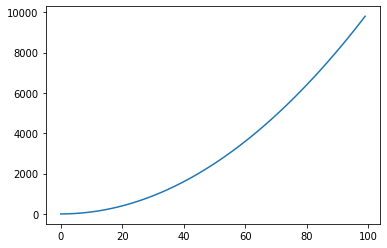

In [1]:
import matplotlib.pyplot as plt
plt.plot([x**2 for x in range(100)])

If we execute the notebook, save it, and then add it to git, we have our base version.  

```
> git add jupyter_git_example.ipynb
> git commit -m "initial git commit for example, for diffing"
```

I won't show the entire source of the notebook here, but you can take a look at the source yourself (use a text editor or ```less``` on the command line) and you'll see it's just a JSON document. But what happens if we re-execute the cell containing the code and save the notebook? What's changed? This is what it looks like for me.

```
> git diff jupyter_git_example.ipynb
> git diff jupyter_git_example.ipynb
diff --git a/tools/jupyter_git_example.ipynb b/tools/jupyter_git_example.ipynb
index 906fb11..750fe85 100644
--- a/tools/jupyter_git_example.ipynb
+++ b/tools/jupyter_git_example.ipynb
@@ -2,17 +2,17 @@
  "cells": [
   {
    "cell_type": "code",
-   "execution_count": 1,
-   "id": "28c01064",
+   "execution_count": 2,
+   "id": "e2c08a0a",
    "metadata": {},
    "outputs": [
     {
      "data": {
       "text/plain": [
-       "[<matplotlib.lines.Line2D at 0x1187977c0>]"
+       "[<matplotlib.lines.Line2D at 0x11891e100>]"
       ]
      },
-     "execution_count": 1,
+     "execution_count": 2,
      "metadata": {},
      "output_type": "execute_result"
     },
@@ -33,6 +33,14 @@
     "import matplotlib.pyplot as plt\n",
     "plt.plot([x**2 for x in range(100)])"
    ]
+  },
+  {
+   "cell_type": "code",
+   "execution_count": null,
+   "id": "2915ced8",
+   "metadata": {},
+   "outputs": [],
+   "source": []
   }
  ],
  "metadata": {

```

What's going on here? You can see that the execution count of the cell changed (along with some of the identifiers). It also added a new blank cell below the top cell (which was created when I executed the first cell). No code actually changed, but we have to look pretty carefully to figure that out, and if you've not seen a notebook file before, this may be confusing.

Now, if I change the code (say from ```x**2``` to ```x**3```) and execute and save the notebook, both the code *and* output will change.

For me, it looks like this 

```
> git diff jupyter_git_example.ipynb
diff --git a/tools/jupyter_git_example.ipynb b/tools/jupyter_git_example.ipynb
index 906fb11..6a8084e 100644
--- a/tools/jupyter_git_example.ipynb
+++ b/tools/jupyter_git_example.ipynb
@@ -2,23 +2,23 @@
  "cells": [
   {
    "cell_type": "code",
-   "execution_count": 1,
-   "id": "28c01064",
+   "execution_count": 3,
+   "id": "57e4b20e",
    "metadata": {},
    "outputs": [
     {
      "data": {
       "text/plain": [
-       "[<matplotlib.lines.Line2D at 0x1187977c0>]"
+       "[<matplotlib.lines.Line2D at 0x11897a160>]"
       ]
      },
-     "execution_count": 1,
+     "execution_count": 3,
      "metadata": {},
      "output_type": "execute_result"
     },
     {
      "data": {
-      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAD4CAYAAAAO9oqkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZ
+      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAXQAAAEDCAYAAAAlRP8qAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZ
       "text/plain": [
        "<Figure size 432x288 with 1 Axes>"
       ]
@@ -31,8 +31,16 @@
    ],
    "source": [
     "import matplotlib.pyplot as plt\n",
-    "plt.plot([x**2 for x in range(100)])"
+    "plt.plot([x**3 for x in range(100)])"
    ]
+  },
+  {
+   "cell_type": "code",
+   "execution_count": null,
+   "id": "09023a82",
+   "metadata": {},
+   "outputs": [],
+   "source": []
```

Like last time, execution counts and ids changed, but now there is both a code change and output change in the diff. Also, the matplotlib image is base64 encoded, so I can't really tell what has changed in the outpub by looking at these results. If we want to make our diffs as clean as possible, what should we do? There's several strategies to consider, and different reasons to choose to use them. 

## Treat notebooks as source code, only commit cleared notebooks
The simplest strategy is to only commit cleared notebooks without output. To make a cleared notebook with no output, select the Kernel menu, and select "Restart & Clear Output". If you save this notebook, you'll see that no output is present in the notebook file, and the only diffs that will appear will be code and metadata. The advantages of this strategy is you are not dealing with messy diffs of output data, especially visual data. For some uses of notebooks, this will make a lot of sense. For example, if your notebooks are [parameterized notebooks for use with papermill](https://www.wrighters.io/parameters-jupyter-notebooks-with-papermill/), you may have a base notebook that you run with dozens or even thousands of different parameters. Saving the random output from one of those parameters is not necessarily that helpful, and saving every version of those notebooks may not make sense. However, saving the base version (without output) may be a great option. This solution is treating notebooks mostly as *source code*, not as data or results.

If you use this option, you may want to consider creating [unit tests for your notebook code](https://www.wrighters.io/unit-testing-python-code-in-jupyter-notebooks/). You also could consider pulling it out into a Python module (in a .py file) instead.

##  Treat notebooks as code and data, but use nbdime
Ideally, you want to save your notebook with the results, that's really one of the main reasons for using notebooks! 

If you are treating a notebook as both code and data, you can use a simple tool to make life easier for you. Install the [nbdime](https://nbdime.readthedocs.io/en/latest/) tool - **n**ote**b**ook **di**ffing and **me**rging. This tool, part of the Jupyter project, knows how to properly diff a notebook file, and integrates with git or mercurial, jupyter, and other tools.

### Installation
You can install nbdime with pip. Ideally, you'll do this in a virtual environment.

```
pip install nbdime
```

### Simple diff
To diff a notebook, just run nbdiff. I went ahead and re-ran the notebook and saved it before running this command (since I'd cleared output earlier). The output is a bit verbose for such a small change, but it's broken down into sections. You can see that there is a change in the cell id, text output by the cell, the cell graphical output, and the cell source. It also notes that a new code cell has been added to the notebook. This is much more understandable for a human!


```
nbdiff jupyter_git_example.ipynb
nbdiff tools/jupyter_git_example.ipynb (HEAD) tools/jupyter_git_example.ipynb
--- tools/jupyter_git_example.ipynb (HEAD)  (no timestamp)
+++ tools/jupyter_git_example.ipynb  2021-09-02 17:25:50.889444
## modified /cells/0/id:
-  28c01064
+  2f344fee

## modified /cells/0/outputs/0/data/text/plain:
-  [<matplotlib.lines.Line2D at 0x1187977c0>]
+  [<matplotlib.lines.Line2D at 0x10f789a60>]

## inserted before /cells/0/outputs/1:
+  output:
+    output_type: display_data
+    data:
+      image/png: iVBORw0K...<snip base64, md5=86ab879409f2b42a...>
+      text/plain: <Figure size 432x288 with 1 Axes>
+    metadata (unknown keys):
+      needs_background: light

## deleted /cells/0/outputs/1:
-  output:
-    output_type: display_data
-    data:
-      image/png: iVBORw0K...<snip base64, md5=d93fe1c011d9afe8...>
-      text/plain: <Figure size 432x288 with 1 Axes>
-    metadata (unknown keys):
-      needs_background: light

## modified /cells/0/source:
@@ -1,2 +1,2 @@
 import matplotlib.pyplot as plt
-plt.plot([x**2 for x in range(100)])

+plt.plot([x**3 for x in range(100)])


## inserted before /cells/1:
+  code cell:
```

### Visual diff
There is also a web-based diffing utility, which allows you to visualize the changes. 

```
nbdiff-web jupyter_git_example.ipynb
```
This will launch a visual diff tool in a new browser tab or window. It looks like this for my notebook example above.


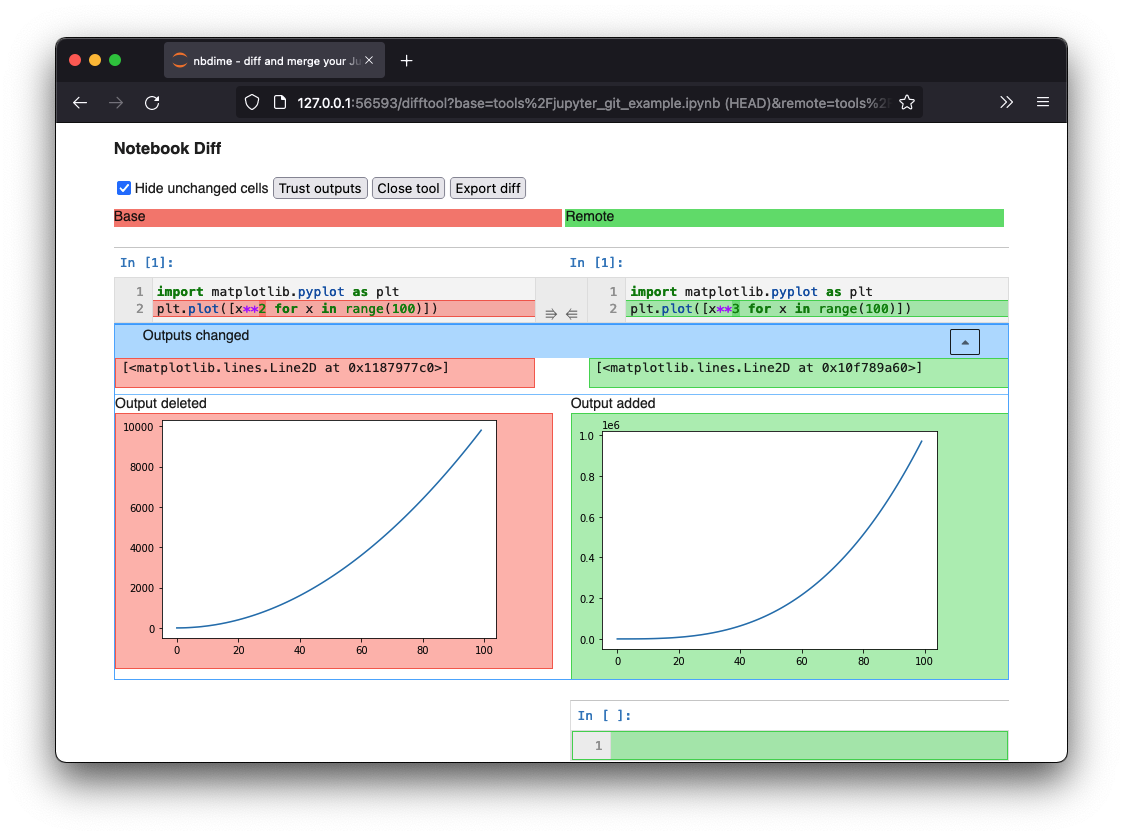

### Git integration
You can configure git to use the nbdiff tool for diffing notebook files. 

From the root of your git project, run the enable command.

```
nbdime config-git --enable
```

By default, it will only enable nbdime in the current repository. You can enable it globally (```--global```) or at a system level (```--system```), and you can also disable it (```--disable```). Once enabled, git diff will output using the nbdiff format.

### Merging
Once you are tracking changes to your notebooks in version control, you will also likely end up with situations where you have to merge changes from another version - either off a branch you created or changes made by another person and delivered to you as another .ipynb file. This can be an incredible hassle if you try to merge results using default git tools, or by hand using the JSON file itself. All the diffs we saw above will not make any sense to git. The merge command will insert the merge conflict markers (i.e. ```<<<<``` and ```=====```) into the code in the middle of the JSON document in places where it makes it into an invalid document. If that's the case, it cannot be loaded into any of the normal Jupyter notebook editing tools, it will have to be inspected by hand.

For a simple example of just merging two notebooks, I made a copy of the notebook above, but changed the source code in one place, then saved it as ```jupyter_git_example2.ipynb```. The merge tool knows how to merge the two changes into a valid notebook file that I can open using Jupyter.

```
nbmerge jupyter_git_example.ipynb jupyter_git_example2.ipynb  > merged.ipynb
```

If I open ```merged.ipnb``` in Jupyter, I see that the code cell contains the merged code - which has a conflict that I can address easily.

```python
import matplotlib.pyplot as plt
<<<<<<< local
plt.plot([x**3 for x in range(100)])
=======
plt.plot([x**4 for x in range(100)])
>>>>>>> remote
```

The merge tools supports many more options, and can do three way merges. It also supports a visual tool, just like nbdiff-web. The merge tools are most helpful when they are integrated with git and used within a git workflow.

For example, you might choose to make a feature branch and do some work on a notebook. Then, you may end up making changes on the main branch. At this point, if you want the changes on your main branch, it needs to be merged. The nbdime merge tools know how to do this merge in the context of a notebook, and you can also do the merge visually.

Here's an annotated example of how we typically get in this situation, and this could be one or several developers committing on multiple branches.

```
> git branch nbdime-example    # make a feature branch
> git checkout nbdime-example  # checkout branch
# work on this branch, make a notebook change, save the notebook
> git add jupyter_git_example.ipynb
> git commit -m "changes on feature branch"
> git checkout main            # switch back to main branch
# make a change to jupyter_git_example.ipynb, but in the same lines as on nbdime-example branch
> git add jupyter_git_example.ipynb
> git commit -m "changes on main branch"
```

At this point, we want to merge these two changes. Once we have nbdime installed, we can use their diff tools to understand the changes better.

```
> git checkout master
> git merge nbdime-example
# get message about merge conflicts
> git mergetool --tool=nbdime
# now we see the merges in context
```

You can check the documents for more detailed setups. You can also enable an nbdiff button right in your Jupyter notebook menubar (in either Jupyter notebook or JupyterLab) if you don't want to run the diffs from the command line. The full instructions are [here](https://nbdime.readthedocs.io/en/latest/extensions.html). Pay attention to whether you want to install the exension in your virtual environment only, or systemwide.

## Some best practices
Here is what has worked pretty well for me when using Jupyter notebooks in version control. Note that larger workgroups may need much more rigid standards, but in general these guidelines work well.

### Extract as much code to Python files as reasonable
Putting code in Python files is going to make it more accessible, testable, and widely used. It also is much easier to diff and merge using version control tools like git. But for some users, staying in the notebook is more convenient, so make it a hard and fast rule is not always reasonable.

### Before committing a notebook, restart it and rerun it, then save. 
With very long running notebooks, this may not be practical, but this will ensure that there are not hidden bugs from running the notebook cells out of order, and the cell metadata (like execution counts) will not change between commits. 

### If a notebook is a template, clear the output and save
For notebooks that are parameterized notebooks for use with papermill, I usually save them with no output.

### Use nbdime to diff and merge Jupyter notebook code
Even if you don't need to use the merge tools, just seeing a nice diff that shows where code changed is a huge help for larger changes. If you make it a practice to install nbdime in your virtual environments for notebook development, you'll find that the extra information and convenience will be very helpful when committing changes, reverting code, or sharing notebook with collaborators.

Even though the notebook format is really helpful, tracking changes to notebooks can be a pain. But we can use strategies and tools to help us make good use of version control tools.